In [149]:
import pandas as pd   # for data manipulation

import numpy as np   # for working with arrays

import matplotlib.pyplot as plt  # for visualization purposes

import seaborn as sns      # supports matplotlib in rendering good and beautiful charts.
sns.set()

import statsmodels as sm   # contains good statistical tools for modeling

from statsmodels.stats.outliers_influence import variance_inflation_factor  # we will need vif for checking multicollinearity

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning

from sklearn.linear_model import LinearRegression,Ridge,Lasso  # linear regression models

from sklearn.tree import DecisionTreeRegressor  # enables us to perform regression using a decision tree

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor  # ensemble methods for regression

from sklearn.metrics import r2_score,mean_squared_error   # for scoring the model and calculating the mean squared error

from sklearn import preprocessing  # for data preprocessing and scaling

In [150]:
cars = pd.read_csv("Automobile.csv")
cars

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [151]:
# let's see the meaning of the columns of the data

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [152]:
cars.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [153]:
# We can see that the odd value is 'nan' representing null
# So we now fill the spot with the mean horsepower

cars.horsepower.fillna(cars.horsepower.mean(),inplace=True)
cars.horsepower = cars.horsepower.astype(int)

# print the info of the data again to see the datatypes of columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    int32  
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 26.6+ KB


In [154]:
# Origin is of object datatype, we transform it so that 'usa' = 2, 'japan' = 1 and 'europe' = 0

le = preprocessing.LabelEncoder()
cars["origin"] = le.fit_transform(cars.values[:, -1:])
cars

C:\Users\91976\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,2
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,2
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,2
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,2
4,ford torino,17.0,8,302.0,140,3449,10.5,70,2
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,2
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,0
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,2
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,2


In [155]:
# We won't be needing the name column so we drop it

cars = cars.drop('name', axis = 1)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,2
1,15.0,8,350.0,165,3693,11.5,70,2
2,18.0,8,318.0,150,3436,11.0,70,2
3,16.0,8,304.0,150,3433,12.0,70,2
4,17.0,8,302.0,140,3449,10.5,70,2
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,2
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,2
396,28.0,4,120.0,79,2625,18.6,82,2


In [156]:
# Check for duplicates and null values

print('sum of duplicated values: {}\n'.format(cars.duplicated().sum()))
print('sum of null values: {}'.format(cars.isnull().sum()))

sum of duplicated values: 0

sum of null values: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [157]:
# Let's print the summary statistics of the data

display(cars.describe())

# This line of code shows the count, mean, standard deviation, minimum and maximum values, 25th, 50th and 70th percentiles
#of each variable in the data.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.449749
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.775076
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,2.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,2.000000


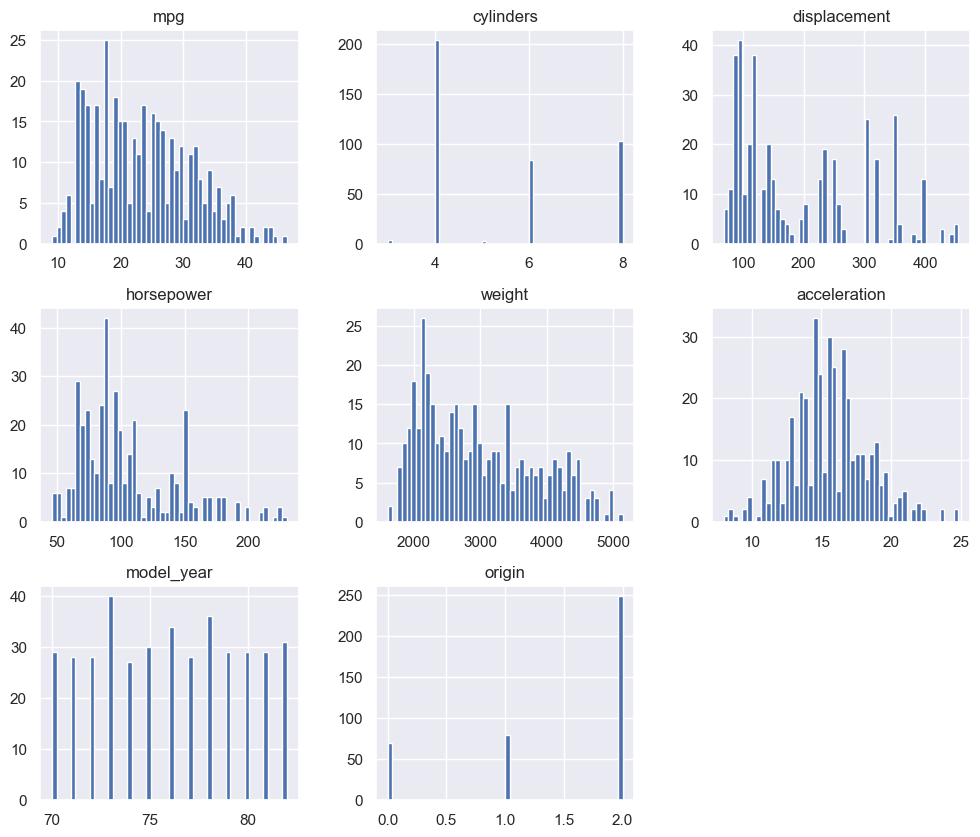

In [158]:
# Let's visualize the distribution of the features of the cars

cars.hist(figsize=(12,10),bins=50)
plt.show()

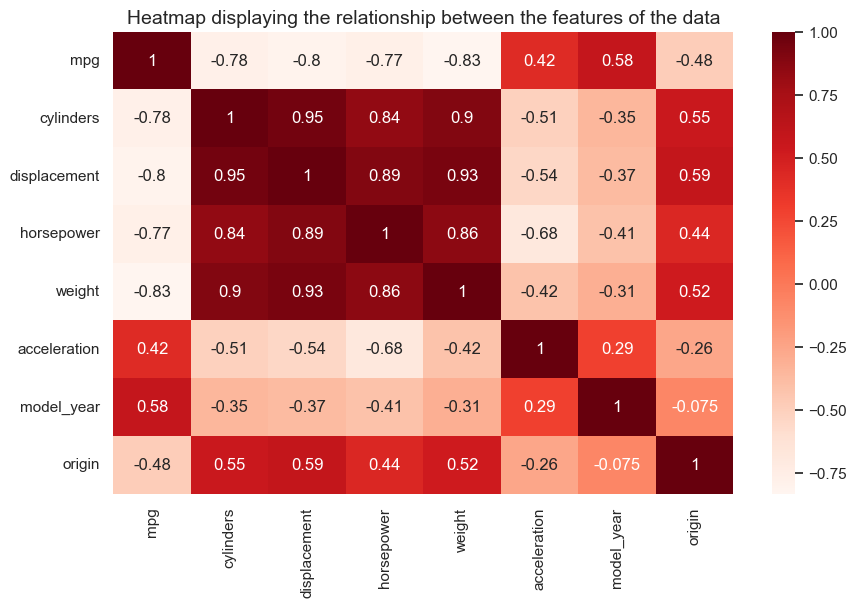

In [159]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and the other features.

plt.figure(figsize=(10, 6))
sns.heatmap(cars.corr(), cmap=plt.cm.Reds, annot=True)
plt.title('Heatmap displaying the relationship between the features of the data', fontsize=14)
plt.show()

In [160]:
# We can see that there is a relationship between the MPG variable and the other variables this satisfies the first
# assumption of linear regression

# There is a strong negative correlation between Cylinders, Displacement, Horesepower and Weight.
# This implies that as these variables increases the MPG decreases

# The Cylinder, Displacement, Horsepower and Weights have a strong positive correlation between themselves which voilates
# the non-multicollinearity assumption of Linear regression.
# Multicollinearity interferes with the performance and the accuracy of our regression model.
# To avoid this, we have to get rid of some of these variables by doing feature selection

# The other variables, ie. acceleration, origin and model_year are not highly correlated with each other.

In [161]:
# We can also check for multicollinearity using the variance inflation factor.
# A variable/feature affected by multicollinearity will have a value greater than 5when we print out the series from the variance inflation factor
# We will have to do a feature selection to get rid of the multicollinearity.

X1 = sm.tools.add_constant(cars) 

series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)

series1

const           766.012946
mpg               5.567189
cylinders        10.650536
displacement     22.846755
horsepower        8.875861
weight           13.926884
acceleration      2.513323
model_year        2.070304
origin            1.797338
dtype: float64

In [162]:
# Let's drop the columns that highly correlate with each other

newcars = cars.drop(['cylinders', 'displacement', 'weight'], axis=1)

# Let's do the variance inflation factor method again after doing a feature selection to see if there's still multicollinearity.

X2 = sm.tools.add_constant(newcars)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

series2

const           689.756348
mpg               3.777405
horsepower        4.140696
acceleration      2.024725
model_year        1.670722
origin            1.438383
dtype: float64

In [163]:
X = newcars.iloc[:,[1, 2, 3, 4]]          # create a DataFrame of independent variables
y = newcars.iloc[:,:1]          # create a series of the dependent variable

# The independent variables are not of the same scale so we scale them 
# Scaling the feature variables ensures fast computing.

X_scaled = preprocessing.scale(X)

# Preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables a DataFrame.

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# Split our data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y ,test_size = .3, random_state = 0)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

LinearRegression()

In [164]:
linear_pred = model.predict(X_test)  # make prediction with the fitted model

# Score the model on the train set

print('Train score: {}\n'.format(model.score(X_train, y_train)))

# Score the model on the test set

print('Test score: {}\n'.format(model.score(X_test, y_test)))
 
# Calculate the overall accuracy of the model

print('Overall model accuracy: {}\n'.format(r2_score(y_test, linear_pred)))

# Compute the mean squared error of the model

print('Mean Squared Error: {}'.format(mean_squared_error(y_test, linear_pred)))

Train score: 0.737831639375192

Test score: 0.7211222132382011

Overall model accuracy: 0.7211222132382011

Mean Squared Error: 17.820815600245552


In [165]:
# Let's fit a ridge regression model and see if we can get a higher accuracy

ridge = Ridge(alpha = .01)
ridge.fit(X_train, y_train)  # fit the model with the training data

ridge_pred = ridge.predict(X_test)  # make predictions

# Score the model to check the accuracy

print('Train score: {}\n'.format(ridge.score(X_train, y_train)))
print('Test score: {}\n'.format(ridge.score(X_test, y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test, ridge_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, ridge_pred)))

Train score: 0.7378316376973343

Test score: 0.7211216855489073

Overall model accuracy: 0.7211216855489073

Mean Squared Error: 17.820849320584877


In [166]:
# We now try to tune the parameters of the ridge model for a better accuracy
# We use a grid search to find the best parameters for the ridge model

ridge_model = Ridge()

param = {'alpha':[0, 0.1, 0.01, 0.001, 1]}  # define the parameters

# Initialize the grid search

ridge_search = GridSearchCV(ridge_model, param, cv = 5, n_jobs = -1)

ridge_search.fit(X_train, y_train)   # fit the model 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

In [167]:
# Print out the best parameter for ridge and score it on the test and train data

print('Best parameter found:\n{}'.format(ridge_search.best_params_))
print('Train score: {}\n'.format(ridge_search.score(X_train, y_train)))
print('Test score: {}'.format(ridge_search.score(X_test, y_test)))

Best parameter found:
{'alpha': 1}
Train score: 0.7378152438114737

Test score: 0.7210535559623299


In [168]:
# Let's try and fit a Lasso model for the regression
# Here, we just move on to making the grid search and find the best parameters

lasso = Lasso()

param['max_iter'] = [1000, 10000, 100000, 1000000]

lasso_search = GridSearchCV(lasso, param, cv = 5, n_jobs = -1) # initialize the grid search

lasso_search.fit(X_train, y_train)  # fit the model

# Print out the best parameters and score it 

print('Best parameter found:\n{}\n'.format(lasso_search.best_params_))
print('Train score: {}\n'.format(lasso_search.score(X_train, y_train)))
print('Test score: {}'.format(lasso_search.score(X_test, y_test)))

C:\Users\91976\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\91976\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Best parameter found:
{'alpha': 0, 'max_iter': 1000000}

Train score: 0.737831639375192

Test score: 0.7211222132383609


C:\Users\91976\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+03, tolerance: 1.656e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [169]:
# We move on to using the ensemble methods for the regression
# Split the unscaled/original X and y data into training and testing data

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .2, random_state = 0)

In [170]:
dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                # define the hyperparameters

tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [171]:
tree_pred = tree_search.predict(xtest)  # make predictions with the model

# Print out the best parameters found and score the model

print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(tree_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,tree_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,tree_pred)))

Best parameter found:
{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2}

Train score: 0.8662006128466332

Test score: 0.7824816120144381

Overall model accuracy: 0.7824816120144381

Mean Squared Error: 13.803145915795294


In [172]:
# We now fit a RandomForestRegressor model and perform a grid search to find the best parameters

forest = RandomForestRegressor()

# We add the n_estimators parameter in our previous parameter dictionary

params['n_estimators'] = [100,200,300,400,500]

forest_search = RandomizedSearchCV(forest, params, cv = 5, n_jobs = -1, n_iter = 50)     # initialize the search

forest_search.fit(xtrain, ytrain)  # fit the model

C:\Users\91976\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [173]:
forest_pred = forest_search.predict(xtest)  # make prediction with the model

# Print out the best parameters and score the model

print('Best parameter found:\n{}\n'.format(forest_search.best_params_))
print('Train score: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(forest_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,forest_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,forest_pred)))

Best parameter found:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 7}

Train score: 0.9266445800155154

Test score: 0.8217007853686122

Overall model accuracy: 0.8217007853686122

Mean Squared Error: 11.31440012506946


In [174]:
# Train a GradientBoostingRegressor model

gradient_model = GradientBoostingRegressor()  # instantiate the model

# Append a learning_rate parameter to the parameter dictionary

params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

gradient_search = RandomizedSearchCV(gradient_model, params, cv = 5, n_jobs = -1, n_iter = 50)    # initialize the search   

gradient_search.fit(xtrain, ytrain)   # fit the model

C:\Users\91976\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [175]:
gradient_pred = gradient_search.predict(xtest)  # make predictions with the model

# Print out the best parameters and score the model

print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(gradient_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(ytest,gradient_pred)))
print('Looks like this model is not too overfitted and it has low mean squared error \
so we use this one........')

Best parameter found:
{'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 2, 'learning_rate': 0.05}

Train score: 0.9108150343965681

Test score: 0.813124345626478

Overall model accuracy: 0.813124345626478

Mean Squared Error: 11.85863847795098

Looks like this model is not too overfitted and it has low mean squared error so we use this one........


C:\Users\91976\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


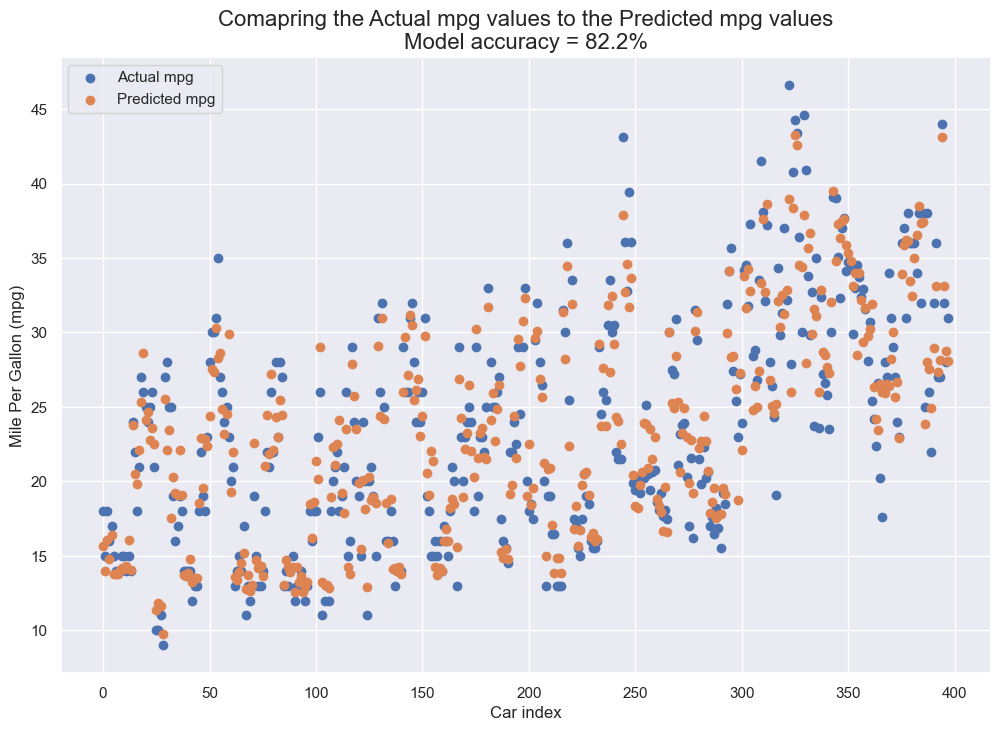

In [182]:
# we will now try to make predictions and see how well our model predicts
# we will visualize the actual mpg values recorded and the mpg values predicted by our 
# model to see how close our predictions are to the actual values.

newcars_new = newcars.drop('mpg',axis=1)  # create a new DataFrame of the feature variables

# make a DataFrame of the actual mpg and the predicted mpg 
data = pd.DataFrame({'Actual mpg':newcars.mpg.values,
                    'Predicted mpg':gradient_search.predict(newcars_new.values)})


# make a scatter plot of the actual and the predicted mpg of a car
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comapring the Actual mpg values to the Predicted mpg values\nModel accuracy = 82.2%',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

In [177]:
"""We can see from the above scatter plot that our model made a good predictions
   as the values of the actual mpg and the predicted mpg are very close to each
   other.
   We can confidently say that we have succeeded in training a model that predicts 
   the Mileage Per Gallon (mpg) of a car given the acceleration, model, origin and 
   the horsepower of a car."""

'We can see from the above scatter plot that our model made a good predictions\n   as the values of the actual mpg and the predicted mpg are very close to each\n   other.\n   We can confidently say that we have succeeded in training a model that predicts \n   the Mileage Per Gallon (mpg) of a car given the acceleration, model, origin and \n   the horsepower of a car.'

In [178]:
# calculate the residuals 
data['Residuals'] = data['Actual mpg']-data['Predicted mpg']
data

,Actual mpg,Predicted mpg,Residuals
0,18.0,15.651754,2.348246
1,15.0,14.017610,0.982390
2,18.0,16.046651,1.953349
3,16.0,14.818620,1.181380
4,17.0,16.408790,0.591210
...,...,...,...
393,27.0,28.174803,-1.174803
394,44.0,43.152267,0.847733
395,32.0,33.121985,-1.121985
396,28.0,28.788371,-0.788371
